# 2D Projection of Amino Acid Embeddings

## Dependencies

In [1]:
# ! pip install amplify umap-learn

In [ ]:

from umap import UMAP
import matplotlib.pyplot as plt

from utils import load_from_hf, load_from_mila

In [3]:
# Model
source = "mila"
model_name = "AMPLIFY350M"
model_path = "../outputs/MILA_PLM_350M_UR100P/checkpoint/pytorch_model.pt"
tokenizer_path = None 
config_path = "../outputs/MILA_PLM_350M_UR100P/checkpoint/config.yaml"

# UMAP
n_neighbors = 20
min_dist = 0.01
n_epochs = 1000

# Log
output_file = "../outputs/AMPLIFY_residues_UMAP.csv"

## Projection

In [4]:
# Get embedding matrix and tokenizer
if source == "hf":
    model, tokenizer = load_from_hf(model_path, tokenizer_path)
    emb_matrix = model.get_input_embeddings().weight.detach().numpy()
elif source == "mila":
    model, tokenizer = load_from_mila(model_path, config_path)
    emb_matrix = model.encoder.weight.detach().numpy()
else:
    raise Exception("Only 'hf' and 'mila' sources are supported, not {source}.")

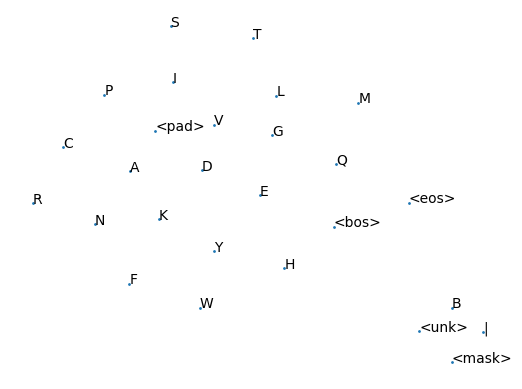

In [5]:
# 2D projection with UMAP
reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_epochs=n_epochs, low_memory=False)
projection = reducer.fit_transform(emb_matrix)

# Save the projection into a csv
with open(output_file, "w") as file:
    file.write("residue,x,y\n")
    for i, (x, y) in enumerate(projection):
        if source == "hf":
            file.write(f"{tokenizer.convert_ids_to_tokens(i)},{x},{y}\n")
        elif source == "mila":
            file.write(f"{tokenizer.id_to_token(i)},{x},{y}\n")

# Plot the projection
plt.scatter(projection.T[0], projection.T[1], s=1)
for i , (x, y) in enumerate(projection):
    if source == "hf":
        txt = tokenizer.convert_ids_to_tokens(i)
    elif source == "mila":
        txt = tokenizer.id_to_token(i)
    plt.annotate(txt, (x, y))
plt.axis("off")
plt.show()